In [3]:
# In the first place we load libraries

# Evalys uses matplotlib to visualize, so lets load it.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os 
# We load the jobset module, which allows to compute
# metrics and visualize workloads from batsim
from evalys.jobset import JobSet
from evalys import visu
from evalys import metrics


/nix/store/s3yjv1kmbxyqpmj2j8hqzzmji3rp5hc4-python3.5-matplotlib-2.0.2/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


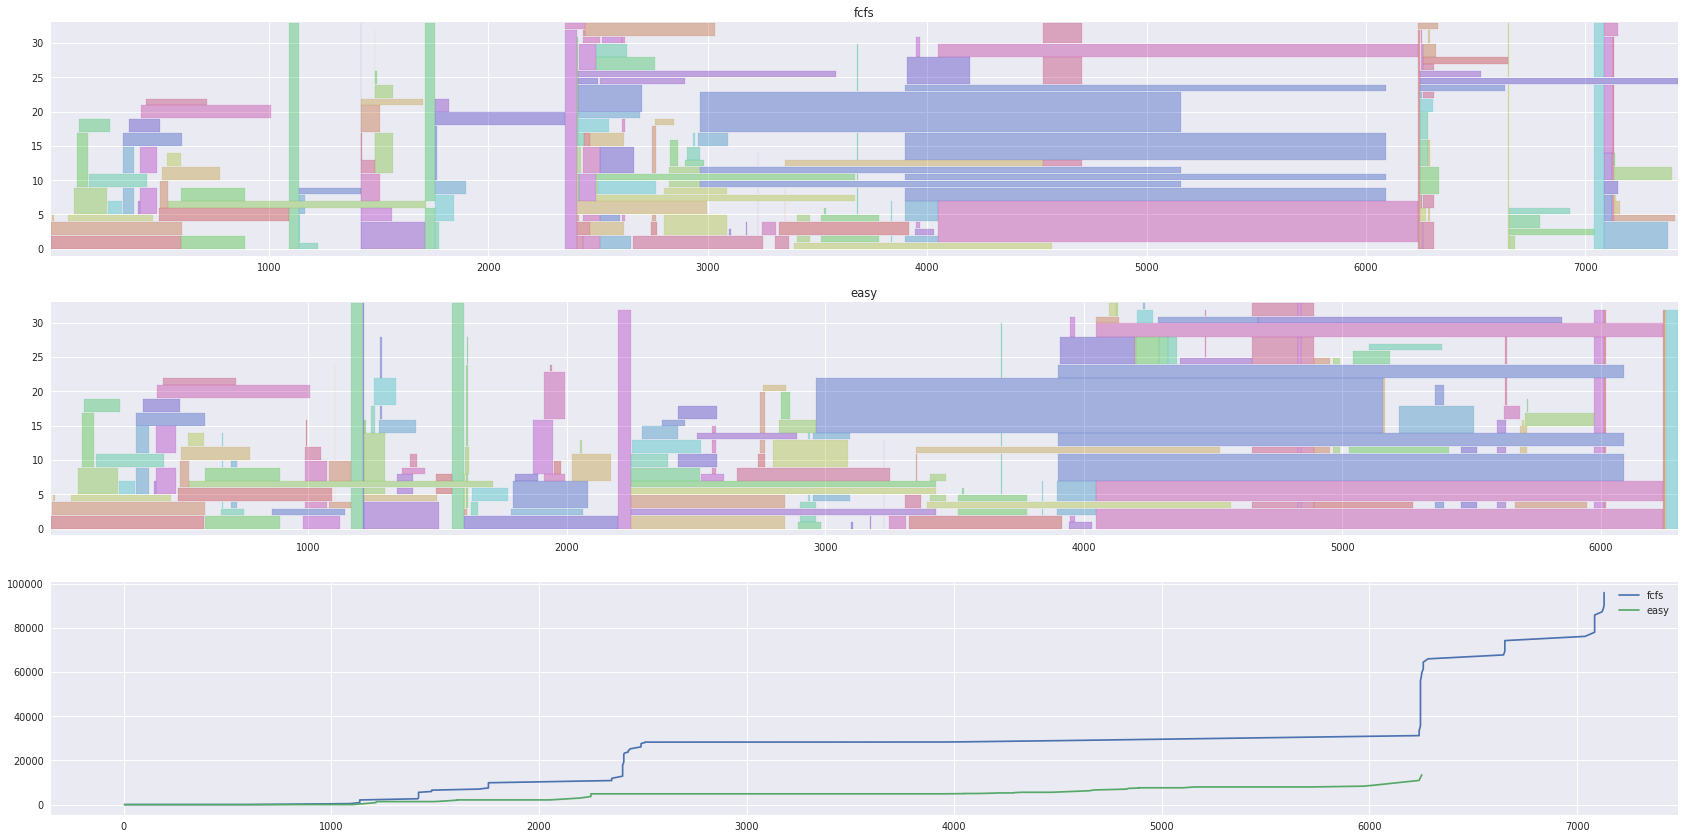

In [14]:
matplotlib.rcParams['figure.dpi'] = 70
matplotlib.rcParams['savefig.dpi'] = 70
matplotlib.rcParams['figure.figsize'] = 30, 15

easy = JobSet.from_csv("/tmp/out/easy/fcfs_dev_jobs.csv")
fcfs = JobSet.from_csv("/tmp/out/fcfs/fcfs_dev_jobs.csv")

fig, axe = plt.subplots(nrows=3)
visu.plot_gantt(fcfs, ax=axe[0], title="fcfs", labels=False);
visu.plot_gantt(easy, ax=axe[1], title="easy", labels=False)

fcfs_cumul = metrics.cumulative_waiting_time(fcfs.df)
easy_cumul = metrics.cumulative_waiting_time(easy.df)

axe[2].plot(fcfs_cumul, label="fcfs")
axe[2].plot(easy_cumul, label="easy")
axe[2].legend()

plt.savefig("../temp/easy_versus_fcfs.png")